C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


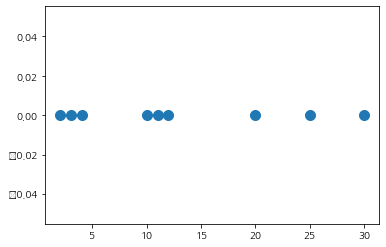

In [1]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from pandas import DataFrame
from scipy.stats import entropy
from math import log, e
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

X=np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])

plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [2]:
model1 = KMeans(n_clusters=2, init=np.array([[3,0],[4,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

c0, c1 = model1.cluster_centers_

c0, c1

(array([2.5, 0. ]), array([16.,  0.]))

In [3]:
model1.score(X)

-372.75

In [4]:
np.mean(X[:,0]), np.mean(X[model1.labels_==0,0]), np.mean(X[model1.labels_==1,0])

(13.0, 3.0, 18.0)

In [5]:
np.count_nonzero(X[model1.labels_==0,0]), np.count_nonzero(X[model1.labels_==1,0])

(3, 6)

In [8]:
def separation(model1):
    total_mean = np.mean(X[:,0])
    m1 = np.mean(X[model1.labels_==0,0])
    m2 = np.mean(X[model1.labels_==1,0])
    count1=np.count_nonzero(X[model1.labels_==0,0])
    count2=np.count_nonzero(X[model1.labels_==1,0])
    separation=count1*(total_mean-m1)**2+count2*(total_mean-m2)**2
    print(separation)

In [9]:
separation(model1) #분리도

450.0


In [10]:
#유사도 매트릭스
list1=[]
np.count_nonzero(X)

9

In [13]:
def s_matrix(model1):
    for i in range(0, np.count_nonzero(X)):
        list1.append([])
        for j in range(0, np.count_nonzero(X)):
            if model1.labels_[i]==model1.labels_[j]:
                list1[i].append(1)
            else:
                list1[i].append(0)
    return list1

In [14]:
list1=[]
s_matrix(model1)

[[1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 1]]

In [19]:
def entropy(labels):
    n_labels=len(labels)
    
    if n_labels <= 1:
        return 0
    
    counts = np.bincount(labels)
    probs = counts / n_labels
    n_classes = len(probs)
    
    if n_classes <= 1:
        return 0
    
    return -np.sum(probs * np.log (probs)/ np.log(n_classes))

In [20]:
entropy(model1.labels_)

0.9182958340544896

In [30]:
X=np.array([[2,0],[3,0],[4,0],[10,0],[11,0],[12,0],[20,0],[25,0],[30,0]])

# K-means, m1=7, m2=25
model1 = KMeans(n_clusters=2, init=np.array([[7,0],[25,0]]), n_init=1, 
               max_iter=1, random_state=1).fit(X)

separation(model1) #분리도

list1=[]
s_matrix(model1) #유사도매트릭스

648.0


[[1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 1]]

In [31]:
entropy(model1.labels_)

0.9182958340544896